# An example on how to use the *vna_package*
*vna_package* contains a Pyhton class (called *SParameter*) for importing and plotting the data collected during FMR measurements.

Let's consider a frequency sweep saved in the following .txt file:

In [1]:
%matplotlib inline
input_file = '.\CPW150-50_FilmRefQ4-30_FreqSweep_1_Gating.txt'

From the same folder in which the *vna_package* is saved, we open a CMD instance and we type **jupyter notebook**. This command starts a Jupyter Notebook instance, from which we can run this notebook (the **.ipynb** version).

The first step consists in importing the relevant packages:

In [2]:
import vna_package as vna
import numpy as np #numpy is always useful

Then, we can import the raw data and subdivide them into the scattering parameter objects:

In [3]:
data = np.genfromtxt(input_file, skip_header=1)
s11 = vna.SParameter(data, type=(1, 1), scan_type=('f', True), unit='mT')
s12 = vna.SParameter(data, type=(1, 2), scan_type=('f', True), unit='mT')
s21 = vna.SParameter(data, type=(2, 1), scan_type=('f', True), unit='mT')
s22 = vna.SParameter(data, type=(2, 2), scan_type=('f', True), unit='mT')

The magic command *%whos* shows the variables space:

In [4]:
%whos

Variable     Type          Data/Info
------------------------------------
data         ndarray       801x220: 176220 elems, type `float64`, 1409760 bytes (1.344451904296875 Mb)
input_file   str           .\CPW150-50_FilmRefQ4-30_FreqSweep_1_Gating.txt
np           module        <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
s11          SParameter    <vna_package.SParameter o<...>ct at 0x0000020CF14B18D0>
s12          SParameter    <vna_package.SParameter o<...>ct at 0x0000020CF14B19B0>
s21          SParameter    <vna_package.SParameter o<...>ct at 0x0000020CF14B1A20>
s22          SParameter    <vna_package.SParameter o<...>ct at 0x0000020CF14B19E8>
vna          module        <module 'vna_package' fro<...>on\\VNA\\vna_package.py'>


The argument *scan_type* of the SParameter constructor is a tuple containing either 'f' (for a frequency sweep) or 'h' (for a field sweep) as first element and either True or False as the second element (True only if the reference measurement has been recorded). The argument *unit* can be 'mT', 'Oe' or 'A' (the last one is for non-calibrated measurements).

The *plot* method allows printing a 2D map for each scattering coefficient:

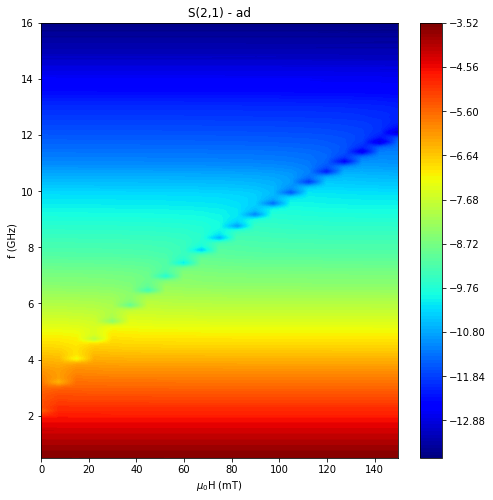

In [5]:
import matplotlib.pyplot as plt #pyplot is always useful
fig1 = plt.figure(figsize=(8, 8)) #the figure is created
ax1 = fig1.add_subplot(1, 1, 1) #the axes are created
s21.plot(ax1, 'ad', xAxis_type='h')

The first argument of the *plot* method is the axes system in which the plot has to be drawn. The *xAxis_type* argument is the quantity we want to consider as the x-axis. The second argument of the *plot* method is the most interesting one and it can take several values, corresponding to different quantities to be plotted:
- 'r' for the real part / 'rn' for the corresponding normalized quantity
- 'i' for the imaginary part / 'in' for the corresponding normalized quantity
- 'a' for the amplitude / 'an' for the corresponding normalized quantity
- 'p' for the phase / 'pn' for the corresponding normalized quantity
- 'ad' for the amplitude in dB / 'and' for the corresponding normalized quantity

The above figure can be exported with the following command:

In [6]:
output_path = './'
fig1.savefig(output_path + 'test_figure.png')

The normalized quantitites (add *n* in the *xAxis_type* argument) are available only when the reference measurement has been recorded. In our case:

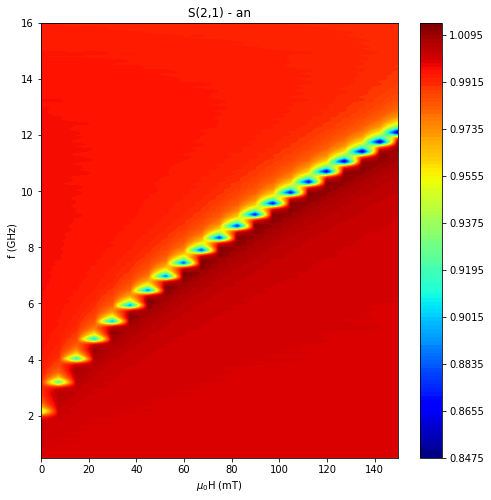

In [7]:
fig2 = plt.figure(figsize=(8, 8))
ax2 = fig2.add_subplot(1, 1, 1)
s21.plot(ax2, 'an', xAxis_type='h')

*vna_package* also contains a function for calculating the Kittel FMR frequency as a function of the applied field:

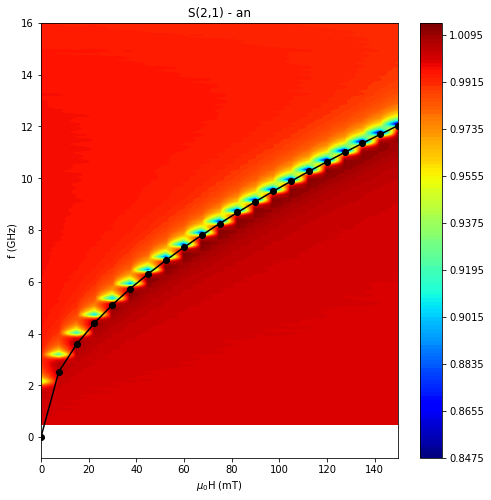

In [8]:
Ms = 8.6e5 #in A/m - Permalloy
n = (1, 0, 0) #(X, Y, Z) - Z is the applied field direction, so X is the out-of-plane direction
kittel_freq = vna.fmr_kittel(s21.field, Ms, n, s21.unit)
fig3 = plt.figure(figsize=(8, 8))
ax3 = fig3.add_subplot(1, 1, 1)
s21.plot(ax3, 'an', xAxis_type='h')
ax3.plot(s21.field, kittel_freq, '-ok')

The *s21* object contains, as attributes, the measured fields and all the relevant info (i.e. the field unit, ...):

In [9]:
print(s21.field)
print(s21.type)
print(s21.scan_type)
print(s21.unit)

[ -3.50141512e-02   7.45199910e+00   1.49507657e+01   2.24400675e+01
   2.99409675e+01   3.74358551e+01   4.49353586e+01   5.24286558e+01
   5.99302152e+01   6.74286715e+01   7.49243349e+01   8.24157314e+01
   8.99163210e+01   9.74133033e+01   1.04917811e+02   1.12410681e+02
   1.19915227e+02   1.27409727e+02   1.34917221e+02   1.42388176e+02
   1.49887796e+02]
(2, 1)
('f', True)
mT


There is also a method for plotting slices of the 2D maps:

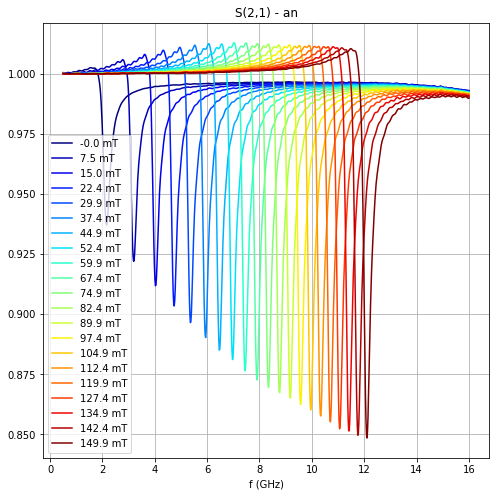

In [10]:
fig4 = plt.figure(figsize=(8, 8))
ax4 = fig4.add_subplot(1, 1, 1)
s21.plot_slice(ax4, 'an', slice_type='f')
leg = ax4.legend(loc='lower left')

The first argument of the *plot_slice* method is the axes system in which the plot has to be drawn. The *slice_type* argument is the quantity we want to consider as the x-axis. The second argument of the *plot_slice* method is the same as the second argument of the *plot* method (see above). If there are too many slices, we can chose to plot only a subset of them, with the *plot_each* argument:

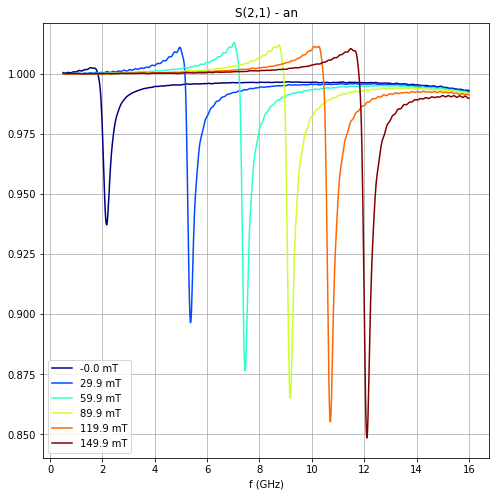

In [11]:
fig5 = plt.figure(figsize=(8, 8))
ax5 = fig5.add_subplot(1, 1, 1)
s21.plot_slice(ax5, 'an', slice_type='f', plot_each=4)
leg = ax5.legend(loc='lower left')